# Target Prediction

Problem Introduction:

Communication with Vidhya:
==========================
Dear Vaibhav, 

Can you please use the software R, Python, Matlab or similar to predict the value of “Target” as a function of the other parameters.

You can prepare the script before the meeting or just coding during the meeting (we will share the screen).

Regards

Vidhya Ramesh
==========================

Proposed Roadmap:

1.State the question and determine required data
2.Acquire the data in an accessible format
3.Identify and correct missing data points/anomalies as required
4.Prepare the data for the machine learning model
5.Establish a baseline model that you aim to exceed
6.Train the model on the training data
7.Make predictions on the test data
8.Compare predictions to the known test set targets and calculate performance metrics
9.If performance is not satisfactory, adjust the model, acquire more data, or try a different modeling technique
10.Interpret model and report results visually and numerically

==========================

Models Tried:

LM

PLS

SVR

Tree Based Regression (CART - Random Forest -Bagging / Boosting)

==========================

Summary & Path Forward


In [8]:
#Import basic packages
import pandas as pd 
import numpy as np 

dataset = pd.read_csv("C:/Users/PATILV27/Desktop/SGRI/DataSet8.csv")
print(dataset)

     Time;TempA;TempB;TempC;TempD;Power1;Power2;Power3;Target Unnamed: 1
0     1/1/17 0:00;1245.1;1261.1;1005.5;977.4;475;410...              NaN
1     1/1/17 4:00;1336.4;1363.4;1078.9;1036.3;440;46...              NaN
2     1/1/17 8:00;1182.1;1198.1;912.8;907.6;485;445;...              NaN
3     1/1/17 12:00;1266.5;1253.5;967.3;976.7;470;400...              NaN
4     1/1/17 16:00;1295.2;1136.8;887.6;989.7;480;430...              NaN
5     1/1/17 20:00;1201.2;1249.6;996.7;906.4;435;470...              NaN
6     1/2/17 0:00;1302.2;1256.9;954;965.4;410;470;45...              NaN
7     1/2/17 4:00;1282.7;1123.2;916.8;1010.3;485;425...              NaN
8     1/2/17 8:00;1297.7;1219.8;961.1;935.4;470;500;...              NaN
9     1/2/17 12:00;1197.5;1276.7;988.1;1025.3;475;46...              NaN
10    1/2/17 16:00;1158.8;1279.7;1034.1;972.5;415;47...              NaN
11    1/2/17 20:00;1338.2;1191.1;949.8;949.7;420;425...              NaN
12    1/3/17 0:00;1286.7;1349.4;1070.9;1029.1;475;4

ORI Data - [1095 rows x 2 columns]

In [9]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [10]:
#Get idea about headlines/tags in dataset
print(dataset.head())

  Time;TempA;TempB;TempC;TempD;Power1;Power2;Power3;Target Unnamed: 1
0  1/1/17 0:00;1245.1;1261.1;1005.5;977.4;475;410...              NaN
1  1/1/17 4:00;1336.4;1363.4;1078.9;1036.3;440;46...              NaN
2  1/1/17 8:00;1182.1;1198.1;912.8;907.6;485;445;...              NaN
3  1/1/17 12:00;1266.5;1253.5;967.3;976.7;470;400...              NaN
4  1/1/17 16:00;1295.2;1136.8;887.6;989.7;480;430...              NaN


In [16]:
dframe = pd.read_csv("C:/Users/PATILV27/Desktop/SGRI/DataSet8_.csv")
dframe.head()

,Time,TempA,TempB,TempC,TempD,Power1,Power2,Power3,Target,Hrs
0,1/1/2017 0:00,1245.1,1261.1,1005.5,977.4,475.0,410.0,460.0,0.233387,0
1,1/1/2017 4:00,1336.4,1363.4,1078.9,1036.3,440.0,460.0,420.0,0.491879,4
2,1/1/2017 8:00,1182.1,1198.1,912.8,907.6,485.0,445.0,435.0,0.387837,8
3,1/1/2017 12:00,1266.5,1253.5,967.3,976.7,470.0,400.0,475.0,0.558123,12
4,1/1/2017 16:00,1295.2,1136.8,887.6,989.7,480.0,430.0,420.0,0.686366,16


In [19]:
from matplotlib.pyplot import *
import matplotlib.pyplot as plt

In [20]:
%matplotlib inline

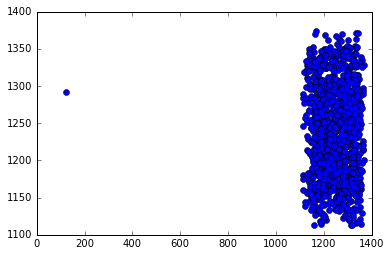

In [21]:
plot (dframe['TempA'], dframe['TempB'], 'o')

Dataset8 is original CSV, 

Dataset8_ is delimiter ediated CSV, 

Dataset8- is 
with all blanks removed
all outliers removed
string datatype erroe removed

In [24]:
dframe = pd.read_csv("C:/Users/PATILV27/Desktop/SGRI/DataSet8_.csv")
dframe.head()

,Time,TempA,TempB,TempC,TempD,Power1,Power2,Power3,Target,Hrs
0,1/1/2017 0:00,1245.1,1261.1,1005.5,977.4,475.0,410.0,460.0,0.233387,0
1,1/1/2017 4:00,1336.4,1363.4,1078.9,1036.3,440.0,460.0,420.0,0.491879,4
2,1/1/2017 8:00,1182.1,1198.1,912.8,907.6,485.0,445.0,435.0,0.387837,8
3,1/1/2017 12:00,1266.5,1253.5,967.3,976.7,470.0,400.0,475.0,0.558123,12
4,1/1/2017 16:00,1295.2,1136.8,887.6,989.7,480.0,430.0,420.0,0.686366,16


In [ ]:
Getting rid of missing data

In [25]:
dframe = dframe.dropna(thresh=10)
dframe.head()
print(dframe)

                 Time   TempA   TempB   TempC   TempD  Power1  Power2  Power3  \
0       1/1/2017 0:00  1245.1  1261.1  1005.5   977.4   475.0   410.0   460.0   
1       1/1/2017 4:00  1336.4  1363.4  1078.9  1036.3   440.0   460.0   420.0   
2       1/1/2017 8:00  1182.1  1198.1   912.8   907.6   485.0   445.0   435.0   
3      1/1/2017 12:00  1266.5  1253.5   967.3   976.7   470.0   400.0   475.0   
4      1/1/2017 16:00  1295.2  1136.8   887.6   989.7   480.0   430.0   420.0   
5      1/1/2017 20:00  1201.2  1249.6   996.7   906.4   435.0   470.0   475.0   
6       1/2/2017 0:00  1302.2  1256.9   954.0   965.4   410.0   470.0   455.0   
7       1/2/2017 4:00  1282.7  1123.2   916.8  1010.3   485.0   425.0   440.0   
8       1/2/2017 8:00  1297.7  1219.8   961.1   935.4   470.0   500.0   470.0   
9      1/2/2017 12:00  1197.5  1276.7   988.1  1025.3   475.0   460.0   435.0   
10     1/2/2017 16:00  1158.8  1279.7  1034.1   972.5   415.0   475.0   440.0   
11     1/2/2017 20:00  1338.

In [26]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
%matplotlib inline

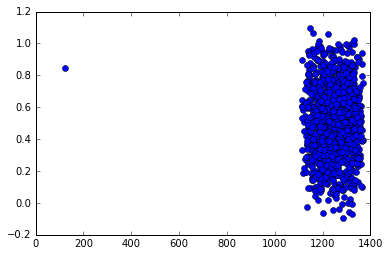

In [27]:
plot (dframe['TempA'], dframe['Target'], 'o')

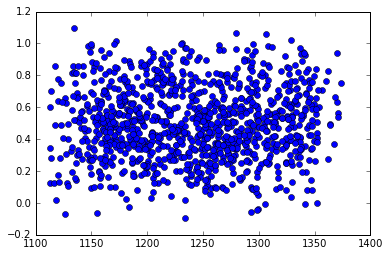

In [28]:
plot (dframe['TempB'], dframe['Target'], 'o')

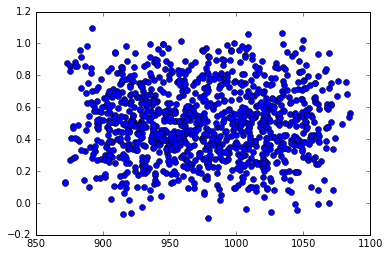

In [29]:
plot (dframe['TempC'], dframe['Target'], 'o')

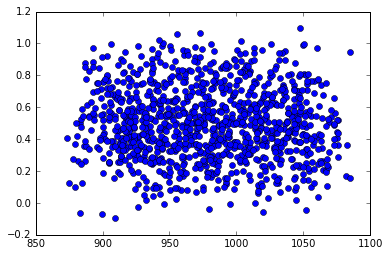

In [30]:
plot (dframe['TempD'], dframe['Target'], 'o')

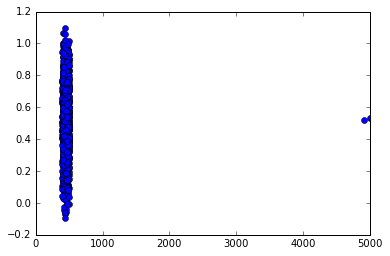

In [31]:
plot (dframe['Power1'], dframe['Target'], 'o')

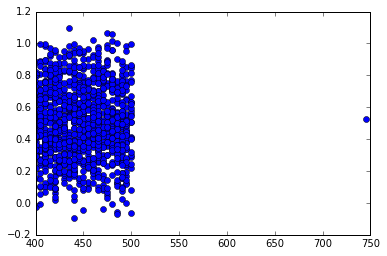

In [32]:
plot (dframe['Power2'], dframe['Target'], 'o')

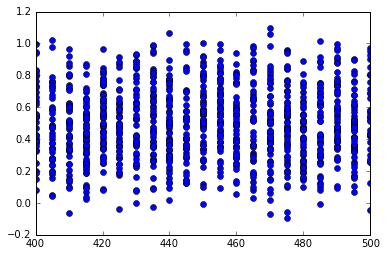

In [33]:
plot (dframe['Power3'], dframe['Target'], 'o')

Cleaned Data

In [35]:
dframe = pd.read_csv("C:/Users/PATILV27/Desktop/SGRI/DataSet8-.csv")
dframe.head()

,Time,TempA,TempB,TempC,TempD,Power1,Power2,Power3,Hrs,Target
0,1/1/2017 0:00,1245.1,1261.1,1005.5,977.4,475,410,460,0,0.233387
1,1/1/2017 4:00,1336.4,1363.4,1078.9,1036.3,440,460,420,4,0.491879
2,1/1/2017 8:00,1182.1,1198.1,912.8,907.6,485,445,435,8,0.387837
3,1/1/2017 12:00,1266.5,1253.5,967.3,976.7,470,400,475,12,0.558123
4,1/1/2017 16:00,1295.2,1136.8,887.6,989.7,480,430,420,16,0.686366


In [36]:
dframe = dframe.dropna(thresh=10)
dframe.head()
print(dframe)

                 Time   TempA   TempB   TempC   TempD  Power1  Power2  Power3  \
0       1/1/2017 0:00  1245.1  1261.1  1005.5   977.4     475     410     460   
1       1/1/2017 4:00  1336.4  1363.4  1078.9  1036.3     440     460     420   
2       1/1/2017 8:00  1182.1  1198.1   912.8   907.6     485     445     435   
3      1/1/2017 12:00  1266.5  1253.5   967.3   976.7     470     400     475   
4      1/1/2017 16:00  1295.2  1136.8   887.6   989.7     480     430     420   
5      1/1/2017 20:00  1201.2  1249.6   996.7   906.4     435     470     475   
6       1/2/2017 0:00  1302.2  1256.9   954.0   965.4     410     470     455   
7       1/2/2017 4:00  1282.7  1123.2   916.8  1010.3     485     425     440   
8       1/2/2017 8:00  1297.7  1219.8   961.1   935.4     470     500     470   
9      1/2/2017 12:00  1197.5  1276.7   988.1  1025.3     475     460     435   
10     1/2/2017 16:00  1158.8  1279.7  1034.1   972.5     415     475     440   
11     1/2/2017 20:00  1338.

In [37]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
%matplotlib inline

Reploting to Check data quality

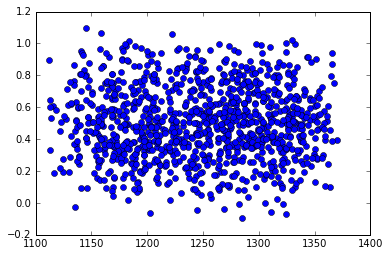

In [38]:
plot (dframe['TempA'], dframe['Target'], 'o')

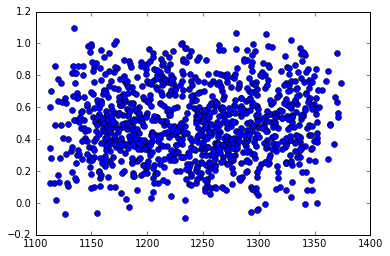

In [39]:
plot (dframe['TempB'], dframe['Target'], 'o')

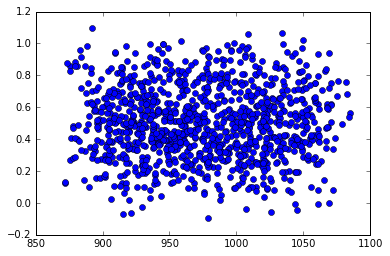

In [40]:
plot (dframe['TempC'], dframe['Target'], 'o')

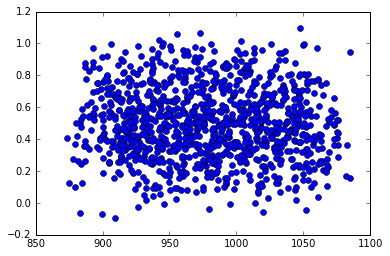

In [41]:
plot (dframe['TempD'], dframe['Target'], 'o')

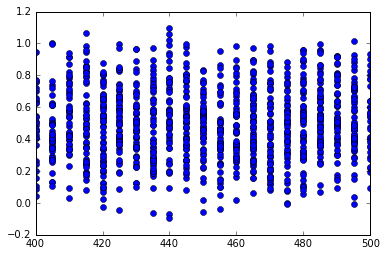

In [42]:
plot (dframe['Power1'], dframe['Target'], 'o')

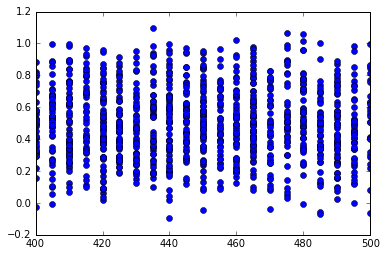

In [43]:
plot (dframe['Power2'], dframe['Target'], 'o')

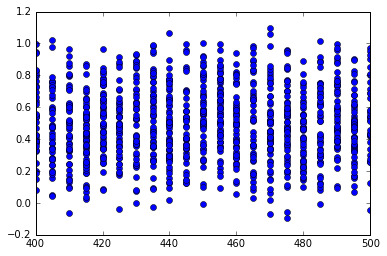

In [44]:
plot (dframe['Power3'], dframe['Target'], 'o')

Data Looks OK Now

In [45]:
import numpy as np

In [54]:
# Classifying the dataset into factors and response
X = dframe.iloc[:, 1:8].values
y = dframe.iloc[:, 9].values

In [55]:
X

array([[ 1245.1,  1261.1,  1005.5, ...,   475. ,   410. ,   460. ],
       [ 1336.4,  1363.4,  1078.9, ...,   440. ,   460. ,   420. ],
       [ 1182.1,  1198.1,   912.8, ...,   485. ,   445. ,   435. ],
       ..., 
       [ 1243.5,  1320.7,  1002.4, ...,   450. ,   475. ,   435. ],
       [ 1197.5,  1282.2,  1013.9, ...,   475. ,   435. ,   430. ],
       [ 1359. ,  1270.2,   987.9, ...,   430. ,   400. ,   465. ]])

In [56]:
y

array([ 0.233387,  0.491879,  0.387837, ...,  0.574329,  0.390415,
        0.422713])

In [66]:
# Splitting the dataset into the Training set and Test set
#from sklearn.model_selection import train_test_split
#for 2.7
from sklearn.cross_validation import train_test_split
#for 3.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [67]:
X_train

array([[ 1261.1,  1246.9,   960. , ...,   425. ,   450. ,   420. ],
       [ 1246.1,  1332.2,  1011.6, ...,   435. ,   445. ,   470. ],
       [ 1122. ,  1144.2,   911.8, ...,   485. ,   475. ,   470. ],
       ..., 
       [ 1320.2,  1175.1,   937.8, ...,   425. ,   425. ,   485. ],
       [ 1201.2,  1252.6,   979.7, ...,   420. ,   430. ,   470. ],
       [ 1189.1,  1288.6,  1010.7, ...,   500. ,   425. ,   425. ]])

In [ ]:
X_test

In [ ]:
y_train

In [ ]:
y_test

Linear Regression

In [57]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#regressor.fit(X_train, y_train)
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
# Predicting the Test set results
#y_pred = regressor.predict(X_test)
y_pred = regressor.predict(X)

In [59]:
y_pred

array([ 0.50369471,  0.48477888,  0.53337348, ...,  0.53047672,
        0.49440581,  0.51241748])

In [ ]:
# Making the Confusion Matrix
#from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test, y_pred)

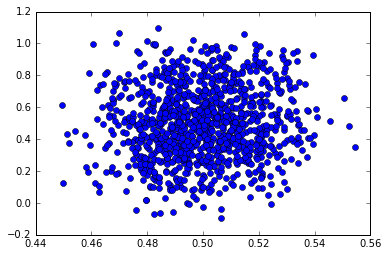

In [60]:
plot (y_pred, y, 'o')

In [61]:
regressor.score(X, y)

0.0059929292545417567

In [62]:
regressor.coef_

array([  7.94242828e-06,   5.59608687e-04,  -6.47187637e-04,
        -1.51874858e-04,   2.52893942e-04,  -1.19121671e-04,
         1.40814249e-04])

In [64]:
regressor.intercept_

0.45121344498926491

Quick Look at LR Model shows - Not really a good fit

LDA
#Need Scalling

In [65]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

NameError: name 'X_train' is not defined

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
from sklearn.cross_decomposition import PLSRegression
pls2 = PLSRegression(n_components=2)
pls2.fit(X_train, y_train)
y_pred = pls2.predict(X_test)

In [ ]:
y_pred

In [ ]:
plot (y_pred, y_test, 'o')

PLS Model Does Not appear doing job

SVR

In [68]:
# SVR
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [69]:
# Importing the dataset
dframe = pd.read_csv("C:/Users/PATILV27/Desktop/SGRI/DataSet8-.csv")

# Remove Missing Data Rows
dframe = dframe.dropna(thresh=10)

# Classifying the dataset into factors and response
X = dframe.iloc[:, 1:8].values
y = dframe.iloc[:, 9].values

In [70]:
# Feature Scaling - Define
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

# Feature Scaling - Apply
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [71]:
X

array([[-0.01975238,  0.33384733,  0.60463543, ...,  0.81153445,
        -1.32873058,  0.34100619],
       [ 1.41757141,  1.94581056,  2.06044477, ..., -0.39022452,
         0.3976354 , -1.03375893],
       [-1.01155302, -0.6588573 , -1.23396846, ...,  1.15489416,
        -0.12027439, -0.51822201],
       ..., 
       [-0.04494097,  1.27297742,  0.5431503 , ..., -0.04686481,
         0.91554519, -0.51822201],
       [-0.76911287,  0.6663246 ,  0.77124032, ...,  0.81153445,
        -0.46554759, -0.69006765],
       [ 1.77336022,  0.477238  ,  0.25555853, ..., -0.73358422,
        -1.67400378,  0.51285183]])

In [72]:
y

array([-1.17309049, -0.03340704, -0.49212509, ...,  0.33011253,
       -0.48075876, -0.33835785])

In [73]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [77]:
# Predicting a new result
y_pred = regressor.predict(X)
y_pred = sc_y.inverse_transform(y_pred)

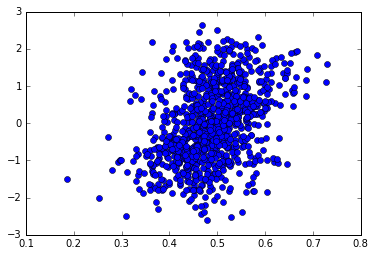

In [78]:
# Visualising the SVR results
plot (y_pred, y, 'o')

In [83]:
regressor.score(X, y)
#regressor.coef
#regressor.intercept

0.13970257624288862

Comment on SVR - Slight better model that LR, PLS but quite underperformer

Random Forest Regression

In [84]:
# Random Forest Regression
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [85]:
# Importing the dataset
dframe = pd.read_csv("C:/Users/PATILV27/Desktop/SGRI/DataSet8-.csv")

# Remove Missing Data Rows
dframe = dframe.dropna(thresh=10)

# Classifying the dataset into factors and response
X = dframe.iloc[:, 1:8].values
y = dframe.iloc[:, 9].values

#No scaling required

10 Trees

In [86]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [87]:
# Predicting a new result
y_pred = regressor.predict(X)

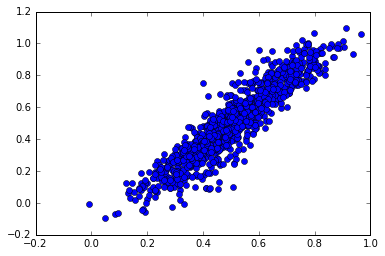

In [88]:
# Visualising the Random Forest Regression results
plot (y_pred, y, 'o')

In [89]:
regressor.score(X, y)

0.79140994693080058

In [113]:
print(regressor.feature_importances_)

[ 0.17481715  0.16710569  0.15593484  0.17760257  0.10475799  0.1121454
  0.10763636]


100 Trees

In [90]:
# Fitting Random Forest Regression to the dataset - 100 trees
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [91]:
# Predicting a new result
y_pred = regressor.predict(X)

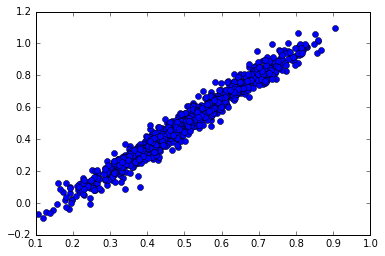

In [92]:
# Visualising the Random Forest Regression results
plot (y_pred, y, 'o')

In [93]:
regressor.score(X, y)

0.85288807593995219

In [112]:
print(regressor.feature_importances_)

[ 0.17481715  0.16710569  0.15593484  0.17760257  0.10475799  0.1121454
  0.10763636]


500 Trees

In [98]:
# Fitting Random Forest Regression to the dataset - 500 trees
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [99]:
# Predicting a new result
y_pred = regressor.predict(X)

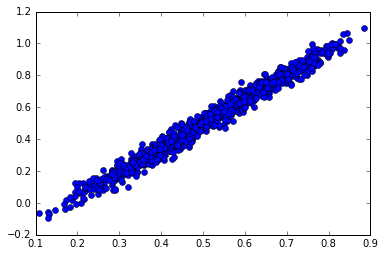

In [100]:
# Visualising the Random Forest Regression results
plot (y_pred, y, 'o')

In [101]:
regressor.score(X, y)

0.85907989019459041

In [111]:
print(regressor.feature_importances_)

[ 0.17481715  0.16710569  0.15593484  0.17760257  0.10475799  0.1121454
  0.10763636]


50 Trees

In [102]:
# Fitting Random Forest Regression to the dataset - 50 trees
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [103]:
# Predicting a new result
y_pred = regressor.predict(X)

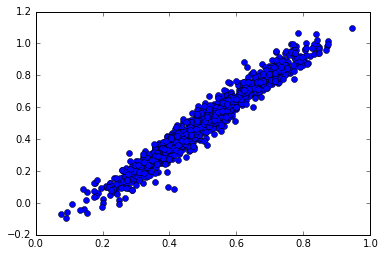

In [104]:
# Visualising the Random Forest Regression results
plot (y_pred, y, 'o')

In [105]:
regressor.score(X, y)

0.85126785500763524

In [107]:
print(regressor.feature_importances_)

[ 0.17481715  0.16710569  0.15593484  0.17760257  0.10475799  0.1121454
  0.10763636]


In [110]:
dframe.head()

,Time,TempA,TempB,TempC,TempD,Power1,Power2,Power3,Hrs,Target
0,1/1/2017 0:00,1245.1,1261.1,1005.5,977.4,475,410,460,0,0.233387
1,1/1/2017 4:00,1336.4,1363.4,1078.9,1036.3,440,460,420,4,0.491879
2,1/1/2017 8:00,1182.1,1198.1,912.8,907.6,485,445,435,8,0.387837
3,1/1/2017 12:00,1266.5,1253.5,967.3,976.7,470,400,475,12,0.558123
4,1/1/2017 16:00,1295.2,1136.8,887.6,989.7,480,430,420,16,0.686366


25 Trees

In [114]:
# Fitting Random Forest Regression to the dataset - 25 trees
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 25, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=25, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [115]:
# Predicting a new result
y_pred = regressor.predict(X)

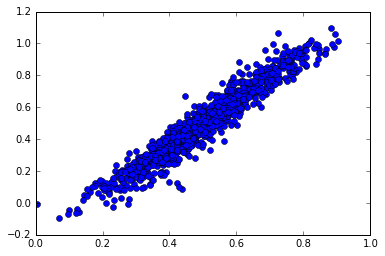

In [116]:
# Visualising the Random Forest Regression results
plot (y_pred, y, 'o')

In [118]:
regressor.score(X, y)

0.83525445618176564

In [119]:
print(regressor.feature_importances_)

[ 0.17397454  0.17085773  0.15887484  0.18069192  0.1008384   0.11195897
  0.1028036 ]


Random Forest Regression seems to be giving fair quality of predictions to start with

50 trees could be apropriate choise with model accuracy at >85%

# Summary

Random Forest Regression seems to be giving fair quality of predictions to start with

50 trees could be apropriate choise with model accuracy at >85%. It can be furthur fine tunes using gridsearch

Splitting Training & Testing data- 80% - 20%

In [244]:
# Importing the dataset
#dframe = pd.read_csv("C:/Users/PATILV27/Desktop/SGRI/DataSet8-.csv")

dframe = pd.read_csv("C:/Users/PATILV27/Desktop/SGRI/DataSet8_.csv")
dframe = dframe[['Time','TempA','TempB','TempC','TempD','Power1','Power2','Power3','Hrs','Target']]

# Remove Missing Data Rows
dframe = dframe.dropna(thresh=10)

# Classifying the dataset into factors and response
X = dframe.iloc[:, 1:8].values
y = dframe.iloc[:, 9].values

In [245]:
# Splitting the dataset into the Training set and Test set
#from sklearn.model_selection import train_test_split
#for 2.7
from sklearn.cross_validation import train_test_split
#for 3.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [247]:
# Fitting Random Forest Regression to the dataset - 500 trees
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [248]:
# Predicting a new result
y_pred = regressor.predict(X_test)

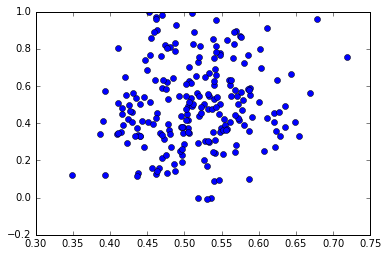

In [249]:
# Visualising the Random Forest Regression results
plot (y_pred, y_test, 'o')

In [250]:
regressor.score(X, y)

0.67480626658014531

In [251]:
print(regressor.feature_importances_)

[ 0.16914987  0.16599025  0.16386893  0.174457    0.11270279  0.10603001
  0.10780116]


AdaBoost

In [255]:
# Importing the dataset
#dframe = pd.read_csv("C:/Users/PATILV27/Desktop/SGRI/DataSet8-.csv")

dframe = pd.read_csv("C:/Users/PATILV27/Desktop/SGRI/DataSet8_.csv")
dframe = dframe[['Time','TempA','TempB','TempC','TempD','Power1','Power2','Power3','Hrs','Target']]

# Remove Missing Data Rows
dframe = dframe.dropna(thresh=10)

# Classifying the dataset into factors and response
X = dframe.iloc[:, 1:8].values
y = dframe.iloc[:, 9].values

In [256]:
# Splitting the dataset into the Training set and Test set
#from sklearn.model_selection import train_test_split
#for 2.7
from sklearn.cross_validation import train_test_split
#for 3.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [252]:
#Quick AdaBoost
from sklearn.ensemble import AdaBoostRegressor
regressor = AdaBoostRegressor(n_estimators = 500, random_state = 0)
regressor.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=500, random_state=0)

In [257]:
#AdaBoost with tuning options
from sklearn.ensemble import AdaBoostRegressor
regressor = AdaBoostRegressor(base_estimator=None, n_estimators=100, learning_rate=1.5, loss='square', random_state=None)
regressor.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.5, loss='square',
         n_estimators=100, random_state=None)

In [258]:
# Predicting a new result
y_pred = regressor.predict(X_test)

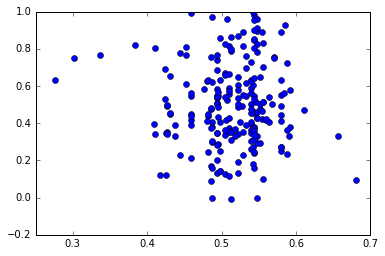

In [259]:
# Visualising the Random Forest Regression results
plot (y_pred, y_test, 'o')

In [260]:
regressor.score(X_train, y_train)

0.12444460169034777

In [261]:
print(regressor.feature_importances_)

[ 0.16830049  0.14047352  0.15171543  0.19359473  0.14566397  0.12694504
  0.07330682]


# AdaBoost  - Even after Iterating with following parameters no much improvmenet in accuracy was observed

n_estimators : integer, optional (default=50)

The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.

learning_rate : float, optional (default=1.)

Learning rate shrinks the contribution of each regressor by learning_rate. There is a trade-off between learning_rate and n_estimators.

loss : {‘linear’, ‘square’, ‘exponential’}, optional (default=’linear’)


# Random Forest Regression Was Found To Be Relatively Best Model Among Tested Models

# Fine Tuning (Grid Search) and K-Fold Cross Validation

10 Fold Cross validation of RandomForest

# 10-Fold Cross validation and Grid Search

In [308]:
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = , num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [309]:
# Create the parameter grid - Detailed One
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [310]:
print(param_grid)

{'max_depth': [10, 20, 30, 40, 50, None], 'bootstrap': [True, False], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['auto', 'sqrt'], 'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200]}


In [312]:
# Create the parameter grid - Quick One
param_grid = {
                 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                 'max_depth': [2, 5, 7, 9]
             }

In [345]:
# Create the parameter grid - n_estimators only
param_grid = {
                 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]
             }

In [346]:
from sklearn.grid_search import GridSearchCV

grid_regressor = GridSearchCV(regressor, param_grid, cv=10)
grid_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=60, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [347]:
grid_regressor.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [348]:
grid_regressor.best_params_

{'n_estimators': 100}

# 100 trees are found to be optimum with CV=10

# Optimized RF Model - Evaluation & Summary

In [321]:
# Importing the dataset
#dframe = pd.read_csv("C:/Users/PATILV27/Desktop/SGRI/DataSet8-.csv")

dframe = pd.read_csv("C:/Users/PATILV27/Desktop/SGRI/DataSet8_.csv")
dframe = dframe[['Time','TempA','TempB','TempC','TempD','Power1','Power2','Power3','Hrs','Target']]

# Remove Missing Data Rows
dframe = dframe.dropna(thresh=10)

# Classifying the dataset into factors and response
X = dframe.iloc[:, 1:8].values
y = dframe.iloc[:, 9].values

In [322]:
# Splitting the dataset into the Training set and Test set
#from sklearn.model_selection import train_test_split
#for 2.7
from sklearn.cross_validation import train_test_split
#for 3.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [349]:
# Fitting Random Forest Regression to the dataset - 50 trees
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score
import numpy as np
#100 trees
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [350]:
# Predicting a new result
y_pred = regressor.predict(X_test)

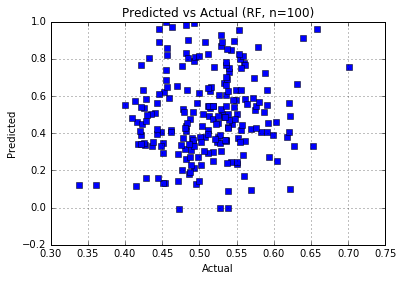

In [374]:
# Visualising the Random Forest Regression results
import numpy as np
import matplotlib.pyplot as plt
plt.plot(y_pred, y_test, 'bs')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Predicted vs Actual (RF, n=100)')
plt.grid(True)
plt.show()

In [372]:
regressor.score(X_train, y_train)

0.85008475556472696

In [376]:
regressor.score(X, y)

0.68308153020674134

In [353]:
print(regressor.feature_importances_)

[ 0.17114787  0.16595651  0.16073384  0.17520024  0.10928749  0.10797752
  0.10969653]


# Random Forest Model (n=100)


# Summary : 1. Random Forest Model with 100 trees can fairly predict "Target" with more that 80% accuracy (Tasted at 10 fold CV)  2. All "Temp" features seems to have higher importance in Decision Tree and shown they are majotr inflencer in prediction of "Target"



# Path Forward : Model accuracy and performance can be improved with  1. More Data,   2. More understanding about data and process along with objective  3. Feature engineering  4. Evaluating other models  5. Ensemble/Blend of multiple models startegy   6. Use of additonal unstructured data along with current information if available 7. Quick reference from liturature/publications 8. Resampling/Bootstarping etc

